# Homework 2: Decision Trees
Due 10/21 at 11:59pm

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Linear_Models.ipynb` for full credit on this assignment.**

### Q4 : Decision Trees

Download the dataset from this website : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
The data is a csv file with the following columns:

__age__: continuous.

__workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

__fnlwgt__: continuous.

__education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

__education-num__: continuous.

__marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

__relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

__race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

__sex__: Female, Male.

__capital-gain__: continuous.

__capital-loss__: continuous.

__hours-per-week__: continuous.

__native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__target__: >50K, <=50K.

1. Read the data into a dataframe and assign column names

In [1]:
#code here
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,f1_score



Bad key "text.kerning_factor" on line 4 in
C:\Users\HP\AppData\Local\Continuum\anaconda3\envs\eods-f21\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from inspect import signature
from functools import partial

from math import log
from joblib import Parallel

from scipy.special import expit
from scipy.special import xlogy
from scipy.optimize import fmin_bfgs

from sklearn.base import (
    BaseEstimator,
    ClassifierMixin,
    RegressorMixin,
    clone,
    MetaEstimatorMixin,
    is_classifier,
)
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.utils import (
    column_or_1d,
    deprecated,
    indexable,
    check_matplotlib_support,
)

from sklearn.utils.multiclass import check_classification_targets
from sklearn.utils.fixes import delayed
from sklearn.utils.validation import (
    _check_sample_weight,
    _num_samples,
    check_consistent_length,
    check_is_fitted,
)
from sklearn.utils import _safe_indexing
# from .isotonic import IsotonicRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import check_cv, cross_val_predict
from sklearn.metrics._base import _check_pos_label_consistency
from sklearn.metrics._plot.base import _get_response
class CalibrationDisplay:
    """Calibration curve (also known as reliability diagram) visualization.
    It is recommended to use
    :func:`~sklearn.calibration.CalibrationDisplay.from_estimator` or
    :func:`~sklearn.calibration.CalibrationDisplay.from_predictions`
    to create a `CalibrationDisplay`. All parameters are stored as attributes.
    Read more about calibration in the :ref:`User Guide <calibration>` and
    more about the scikit-learn visualization API in :ref:`visualizations`.
    .. versionadded:: 1.0
    Parameters
    -----------
    prob_true : ndarray of shape (n_bins,)
        The proportion of samples whose class is the positive class (fraction
        of positives), in each bin.
    prob_pred : ndarray of shape (n_bins,)
        The mean predicted probability in each bin.
    y_prob : ndarray of shape (n_samples,)
        Probability estimates for the positive class, for each sample.
    estimator_name : str, default=None
        Name of estimator. If None, the estimator name is not shown.
    Attributes
    ----------
    line_ : matplotlib Artist
        Calibration curve.
    ax_ : matplotlib Axes
        Axes with calibration curve.
    figure_ : matplotlib Figure
        Figure containing the curve.
    See Also
    --------
    calibration_curve : Compute true and predicted probabilities for a
        calibration curve.
    CalibrationDisplay.from_predictions : Plot calibration curve using true
        and predicted labels.
    CalibrationDisplay.from_estimator : Plot calibration curve using an
        estimator and data.
    Examples
    --------
    >>> from sklearn.datasets import make_classification
    >>> from sklearn.model_selection import train_test_split
    >>> from sklearn.linear_model import LogisticRegression
    >>> from sklearn.calibration import calibration_curve, CalibrationDisplay
    >>> X, y = make_classification(random_state=0)
    >>> X_train, X_test, y_train, y_test = train_test_split(
    ...     X, y, random_state=0)
    >>> clf = LogisticRegression(random_state=0)
    >>> clf.fit(X_train, y_train)
    LogisticRegression(random_state=0)
    >>> y_prob = clf.predict_proba(X_test)[:, 1]
    >>> prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    >>> disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    >>> disp.plot()
    <...>
    """

    def __init__(self, prob_true, prob_pred, y_prob, *, estimator_name=None):
        self.prob_true = prob_true
        self.prob_pred = prob_pred
        self.y_prob = y_prob
        self.estimator_name = estimator_name

    def plot(self, *, ax=None, name=None, ref_line=True, **kwargs):
        """Plot visualization.
        Extra keyword arguments will be passed to
        :func:`matplotlib.pyplot.plot`.
        Parameters
        ----------
        ax : Matplotlib Axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        name : str, default=None
            Name for labeling curve. If `None`, use `estimator_name` if
            not `None`, otherwise no labeling is shown.
        ref_line : bool, default=True
            If `True`, plots a reference line representing a perfectly
            calibrated classifier.
        **kwargs : dict
            Keyword arguments to be passed to :func:`matplotlib.pyplot.plot`.
        Returns
        -------
        display : :class:`~sklearn.calibration.CalibrationDisplay`
            Object that stores computed values.
        """
#         check_matplotlib_support("CalibrationDisplay.plot")
        import matplotlib.pyplot as plt

        if ax is None:
            fig, ax = plt.subplots()

        name = self.estimator_name if name is None else name

        line_kwargs = {}
        if name is not None:
            line_kwargs["label"] = name
        line_kwargs.update(**kwargs)

        ref_line_label = "Perfectly calibrated"
        existing_ref_line = ref_line_label in ax.get_legend_handles_labels()[1]
        if ref_line and not existing_ref_line:
            ax.plot([0, 1], [0, 1], "k:", label=ref_line_label)
        self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]

        if "label" in line_kwargs:
            ax.legend(loc="lower right")

        ax.set(xlabel="Mean predicted probability", ylabel="Fraction of positives")

        self.ax_ = ax
        self.figure_ = ax.figure
        return self

    @classmethod
    def from_estimator(
        cls,
        estimator,
        X,
        y,
        *,
        n_bins=5,
        strategy="uniform",
        name=None,
        ref_line=True,
        ax=None,
        **kwargs,
    ):
        """Plot calibration curve using a binary classifier and data.
        A calibration curve, also known as a reliability diagram, uses inputs
        from a binary classifier and plots the average predicted probability
        for each bin against the fraction of positive classes, on the
        y-axis.
        Extra keyword arguments will be passed to
        :func:`matplotlib.pyplot.plot`.
        Read more about calibration in the :ref:`User Guide <calibration>` and
        more about the scikit-learn visualization API in :ref:`visualizations`.
        .. versionadded:: 1.0
        Parameters
        ----------
        estimator : estimator instance
            Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
            in which the last estimator is a classifier. The classifier must
            have a :term:`predict_proba` method.
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Input values.
        y : array-like of shape (n_samples,)
            Binary target values.
        n_bins : int, default=5
            Number of bins to discretize the [0, 1] interval into when
            calculating the calibration curve. A bigger number requires more
            data.
        strategy : {'uniform', 'quantile'}, default='uniform'
            Strategy used to define the widths of the bins.
            - `'uniform'`: The bins have identical widths.
            - `'quantile'`: The bins have the same number of samples and depend
              on predicted probabilities.
        name : str, default=None
            Name for labeling curve. If `None`, the name of the estimator is
            used.
        ref_line : bool, default=True
            If `True`, plots a reference line representing a perfectly
            calibrated classifier.
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        **kwargs : dict
            Keyword arguments to be passed to :func:`matplotlib.pyplot.plot`.
        Returns
        -------
        display : :class:`~sklearn.calibration.CalibrationDisplay`.
            Object that stores computed values.
        See Also
        --------
        CalibrationDisplay.from_predictions : Plot calibration curve using true
            and predicted labels.
        Examples
        --------
        >>> import matplotlib.pyplot as plt
        >>> from sklearn.datasets import make_classification
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn.linear_model import LogisticRegression
        >>> from sklearn.calibration import CalibrationDisplay
        >>> X, y = make_classification(random_state=0)
        >>> X_train, X_test, y_train, y_test = train_test_split(
        ...     X, y, random_state=0)
        >>> clf = LogisticRegression(random_state=0)
        >>> clf.fit(X_train, y_train)
        LogisticRegression(random_state=0)
        >>> disp = CalibrationDisplay.from_estimator(clf, X_test, y_test)
        >>> plt.show()
        """
        method_name = f"{cls.__name__}.from_estimator"
#         check_matplotlib_support(method_name)

        if not is_classifier(estimator):
            raise ValueError("'estimator' should be a fitted classifier.")

        # FIXME: `pos_label` should not be set to None
        # We should allow any int or string in `calibration_curve`.
        y_prob, _ = _get_response(
            X, estimator, response_method="predict_proba", pos_label=None
        )

        name = name if name is not None else estimator.__class__.__name__
        return cls.from_predictions(
            y,
            y_prob,
            n_bins=n_bins,
            strategy=strategy,
            name=name,
            ref_line=ref_line,
            ax=ax,
            **kwargs,
        )

    @classmethod
    def from_predictions(
        cls,
        y_true,
        y_prob,
        *,
        n_bins=5,
        strategy="uniform",
        name=None,
        ref_line=True,
        ax=None,
        **kwargs,
    ):
        """Plot calibration curve using true labels and predicted probabilities.
        Calibration curve, also known as reliability diagram, uses inputs
        from a binary classifier and plots the average predicted probability
        for each bin against the fraction of positive classes, on the
        y-axis.
        Extra keyword arguments will be passed to
        :func:`matplotlib.pyplot.plot`.
        Read more about calibration in the :ref:`User Guide <calibration>` and
        more about the scikit-learn visualization API in :ref:`visualizations`.
        .. versionadded:: 1.0
        Parameters
        ----------
        y_true : array-like of shape (n_samples,)
            True labels.
        y_prob : array-like of shape (n_samples,)
            The predicted probabilities of the positive class.
        n_bins : int, default=5
            Number of bins to discretize the [0, 1] interval into when
            calculating the calibration curve. A bigger number requires more
            data.
        strategy : {'uniform', 'quantile'}, default='uniform'
            Strategy used to define the widths of the bins.
            - `'uniform'`: The bins have identical widths.
            - `'quantile'`: The bins have the same number of samples and depend
              on predicted probabilities.
        name : str, default=None
            Name for labeling curve.
        ref_line : bool, default=True
            If `True`, plots a reference line representing a perfectly
            calibrated classifier.
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        **kwargs : dict
            Keyword arguments to be passed to :func:`matplotlib.pyplot.plot`.
        Returns
        -------
        display : :class:`~sklearn.calibration.CalibrationDisplay`.
            Object that stores computed values.
        See Also
        --------
        CalibrationDisplay.from_estimator : Plot calibration curve using an
            estimator and data.
        Examples
        --------
        >>> import matplotlib.pyplot as plt
        >>> from sklearn.datasets import make_classification
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn.linear_model import LogisticRegression
        >>> from sklearn.calibration import CalibrationDisplay
        >>> X, y = make_classification(random_state=0)
        >>> X_train, X_test, y_train, y_test = train_test_split(
        ...     X, y, random_state=0)
        >>> clf = LogisticRegression(random_state=0)
        >>> clf.fit(X_train, y_train)
        LogisticRegression(random_state=0)
        >>> y_prob = clf.predict_proba(X_test)[:, 1]
        >>> disp = CalibrationDisplay.from_predictions(y_test, y_prob)
        >>> plt.show()
        """
        method_name = f"{cls.__name__}.from_estimator"
#         check_matplotlib_support(method_name)

        prob_true, prob_pred = calibration_curve(
            y_true, y_prob, n_bins=n_bins, strategy=strategy
        )
        name = name if name is not None else "Classifier"

        disp = cls(
            prob_true=prob_true, prob_pred=prob_pred, y_prob=y_prob, estimator_name=name
        )
        return disp.plot(ax=ax, ref_line=ref_line, **kwargs)

In [3]:
column = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
adult_data =  pd.read_csv('adult.data', keep_default_na = True, names = column, sep=", ")
display(adult_data.head(5))

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(adult_data.target.value_counts())

<=50K    24720
>50K      7841
Name: target, dtype: int64

2. Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why?

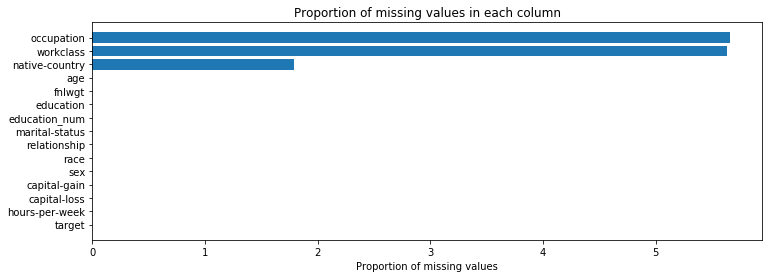

In [5]:
#code here
fig,ax = plt.subplots(1,1,figsize = (12,4))
nrow, ncol = adult_data.shape
# missing = {col: len(adult_data[(adult_data[col] == "?") | (adult_data[col] == 0)])/nrow*100 for col in column}
missing = {col: len(adult_data[(adult_data[col] == "?")])/nrow*100 for col in column}
missing = { k: v for k, v in sorted(missing.items(), key=lambda item: item[1], reverse = True)}
plt.barh(list(missing.keys()),list(missing.values()));
ax.set_xlabel("Proportion of missing values");
ax.set_title("Proportion of missing values in each column");
ax.invert_yaxis();
# adult_data[adult_data['native-country']=='?']

In [6]:
# adult_data_pro = adult_data.drop(columns = ['capital-loss','capital-gain'])
adult_data_pro = adult_data.copy()
for col in adult_data_pro.columns:
    adult_data_pro[col][(adult_data_pro[col] == "?")] = None 
adult_data_pro.dropna(axis = 0, how = 'any', inplace = True)

I won't consider dropping columns, because the proportions of the missing values are low. When applying decision tree, I think there is no need imputing the missing values because decision tree can handle missing values itself. But for convenience, I drop the missing values.

3. Pick 3 categorical features and for each categorical feature, plot side-by-side bars (horizontal or vertical) of class distribution for each category. 

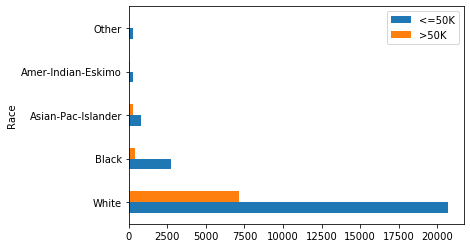

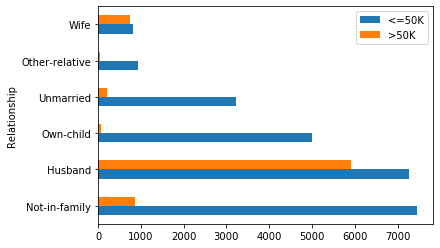

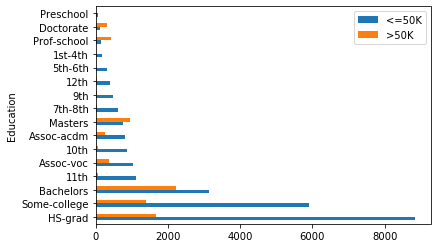

In [7]:
#code here
# I choose race, relationship, education
tar1 = adult_data[adult_data.target == "<=50K"]
tar2 = adult_data[adult_data.target == ">50K"]
race1 = tar1.race.value_counts()
race2 = tar2.race.value_counts()
bar = pd.concat([race1,race2],axis = 1)
bar.columns = ["<=50K",">50K"]
ax1 = bar.plot.barh();
ax1.set_ylabel("Race")
relationship1 = tar1.relationship.value_counts()
relationship2 = tar2.relationship.value_counts()
bar = pd.concat([relationship1,relationship2],axis = 1)
bar.columns = ["<=50K",">50K"]
ax2 = bar.plot.barh();
ax2.set_ylabel("Relationship")
education1 = tar1.education.value_counts()
education2 = tar2.education.value_counts()
bar = pd.concat([education1,education2],axis = 1)
bar.columns = ["<=50K",">50K"]
ax3 = bar.plot.barh();
ax3.set_ylabel("Education");

In [8]:
def fun(x):
    if x == ">50K":
        return 1
    else:
        return 0

adult_data_pro.target = adult_data_pro['target'].apply(lambda x: fun(x))
# adult_data_pro[adult_data_pro.target == ">50K",'target'] = 1
# adult_data_pro[adult_data_pro.target == "<=50K",'target'] = 0
display(adult_data_pro)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


4. Split the dataset into development and test datasets using 80/20 ratio

In [9]:
#code here
X = adult_data_pro.drop(columns = ['target'])
X_dev, X_test, y_dev, y_test = train_test_split(X, adult_data_pro.target, test_size = 0.2, train_size=0.8,random_state = 10)

5. Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on development data and test data?

In [10]:
#code here
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import tree
num_features = [
    'fnlwgt',
    'age',    
    'education_num',    
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]
ohe_features = [
    'marital-status',
    'relationship',
    'race',
    'sex'
]
te_features = [
    'workclass',
    'education',
    'occupation',
    'native-country'
]
# preprocess = make_column_transformer((StandardScaler(),num_features))
preprocess = make_column_transformer((StandardScaler(),num_features),
                                     (OneHotEncoder(handle_unknown = "ignore"),ohe_features),
                                    (TargetEncoder(handle_unknown = "ignore"),te_features))
pipe_tree = make_pipeline(preprocess,DecisionTreeClassifier())
pipe_tree.fit(X_dev,y_dev)
y_pred = pipe_tree.predict(X_test)
print(f"develop: {pipe_tree.score(X_dev,y_dev)}")
print(f"test: {pipe_tree.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred,pos_label = 1):0.4f}.")

develop: 1.0
test: 0.8093817337974474
The recall on test data is 0.6391.
The precision on test data is 0.6188.
The F1-score on test data is 0.6288.


6. Visualize the trained tree

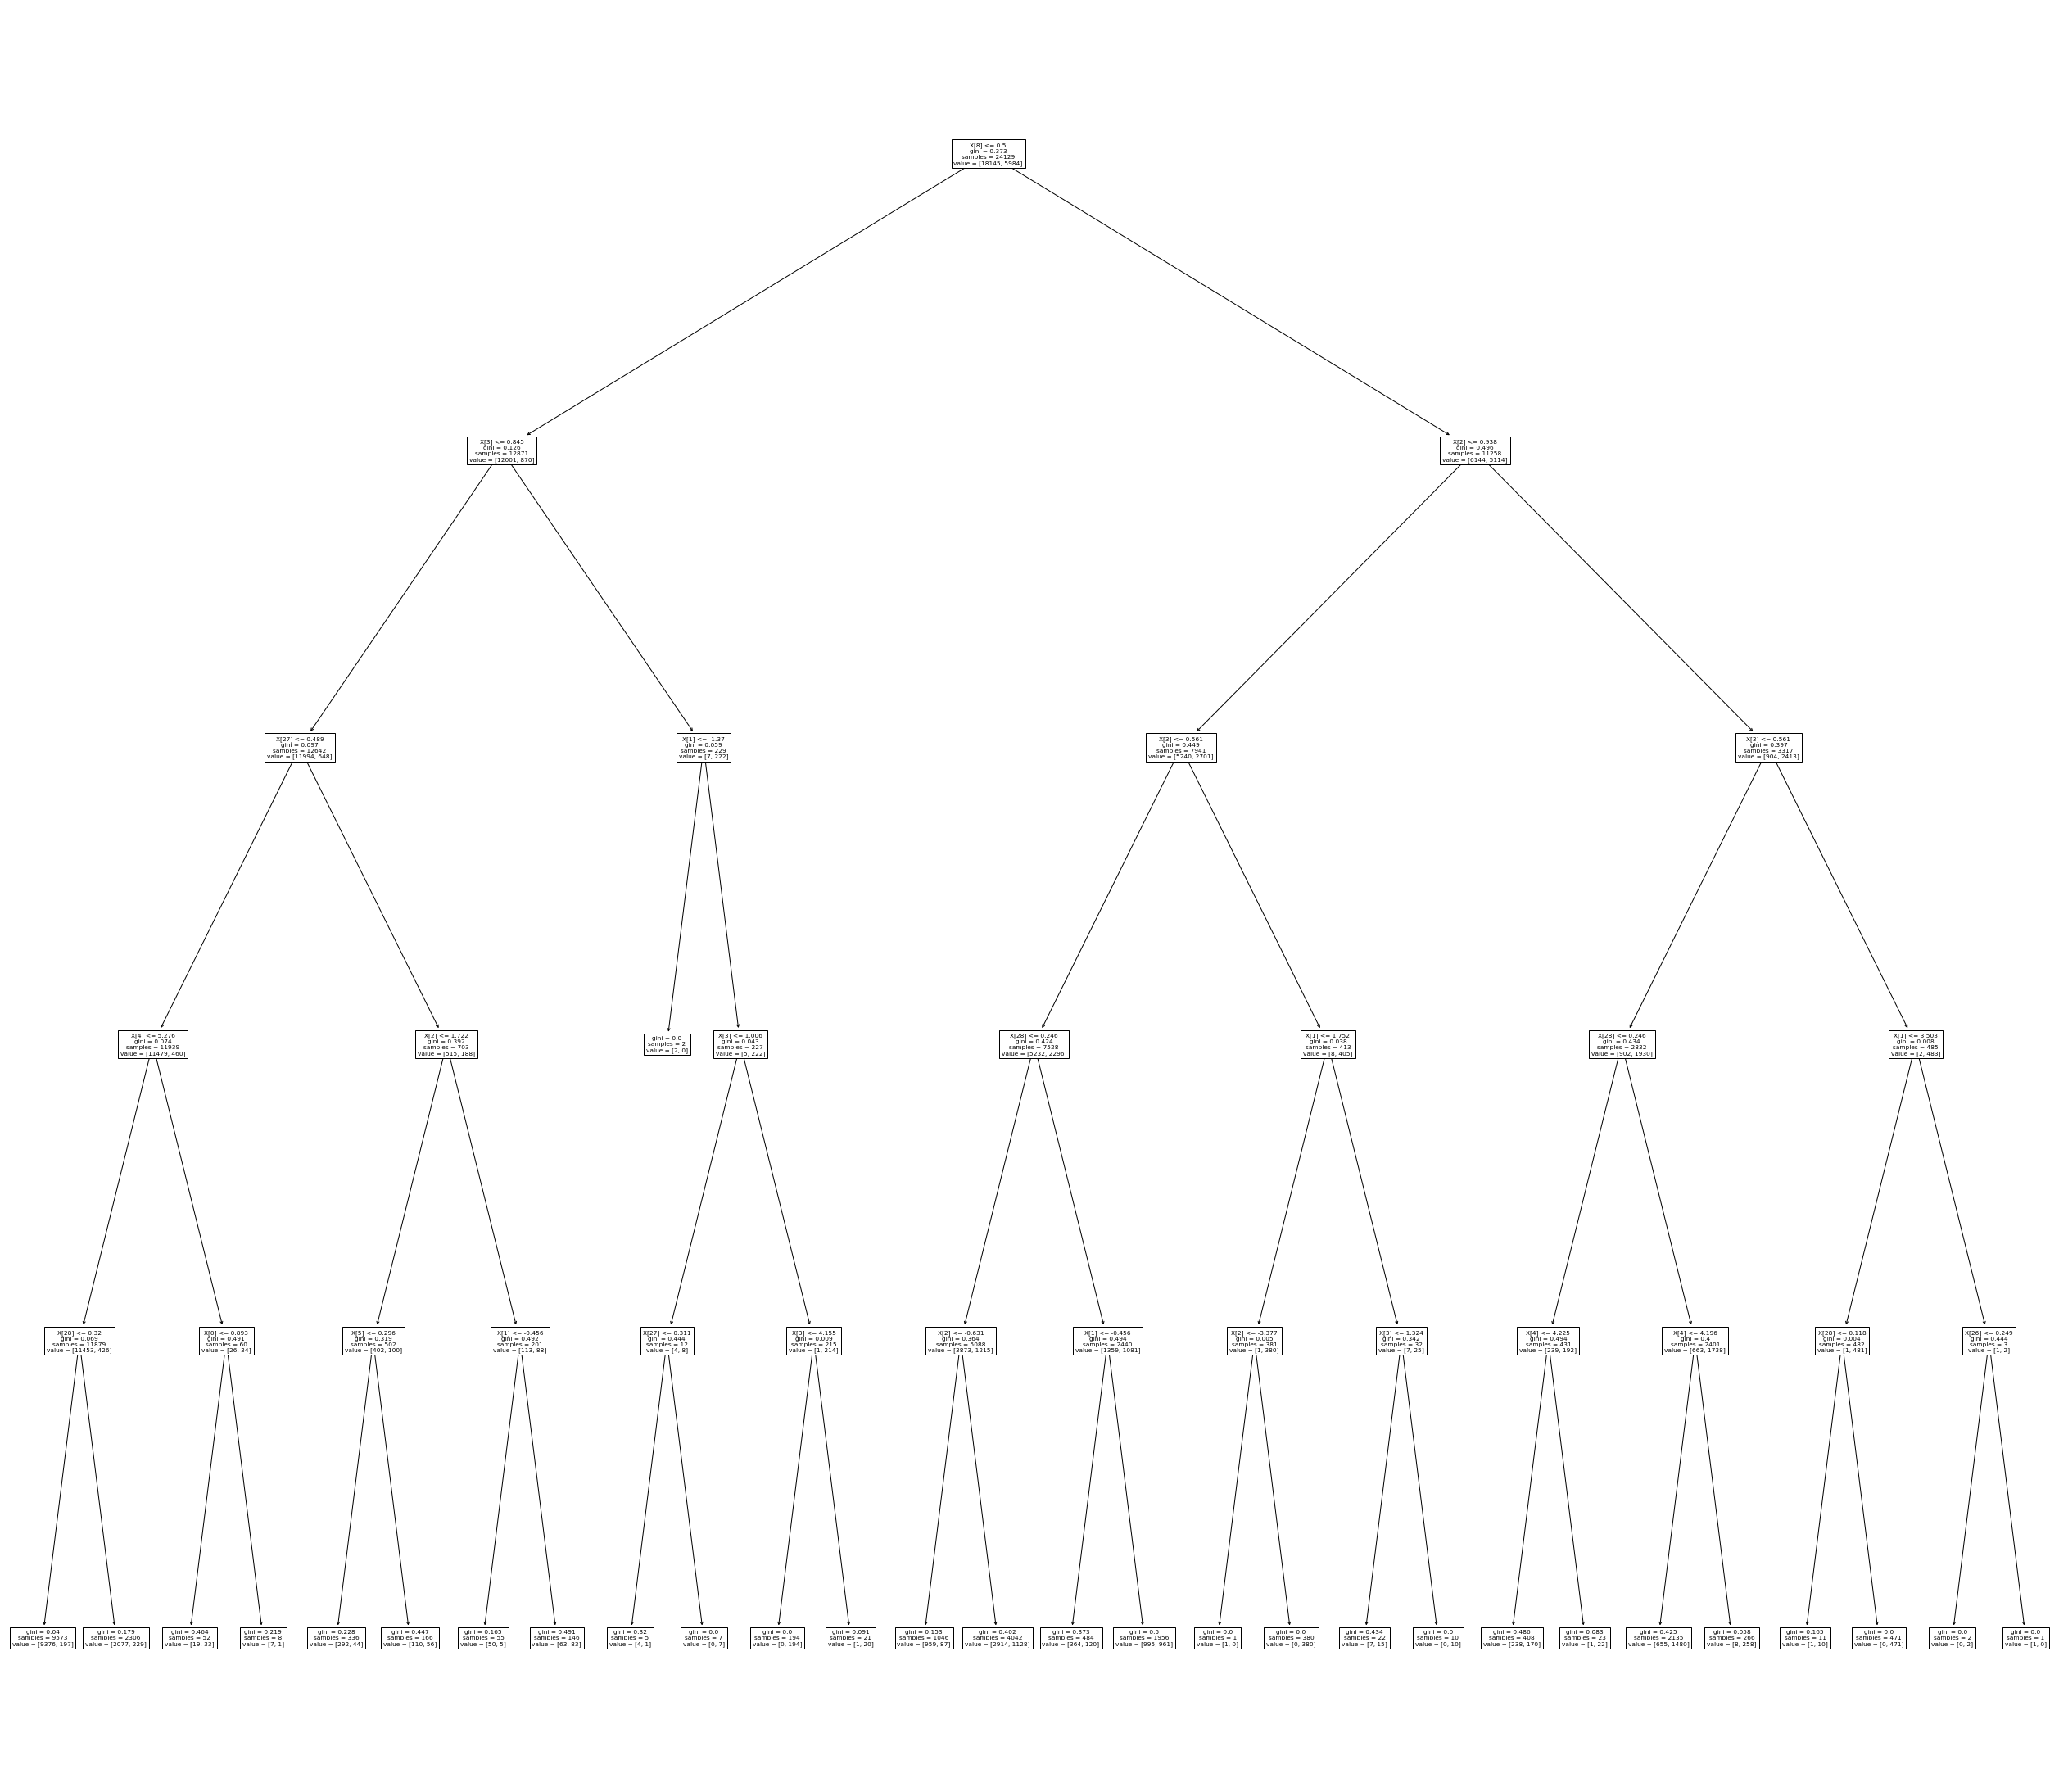

In [11]:
#code here
pipe_small = make_pipeline(preprocess,DecisionTreeClassifier(max_depth = 5))
pipe_small.fit(X_dev,y_dev)
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(pipe_small['decisiontreeclassifier'])

7. Prune the tree using one of the techniques discussed in class and evaluate the performance on the test set again.

In [12]:
# I choose to use cost complexity pruning
ccp_alphas = np.arange(0,0.05,0.001)
pipes = []
for ccp_alpha in ccp_alphas:
    pipe = make_pipeline(preprocess,DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha))
    pipe.fit(X_dev,y_dev)
    pipes.append(pipe)
dev_scores = [pipe.score(X_dev, y_dev) for pipe in pipes]
test_scores = [pipe.score(X_test, y_test) for pipe in pipes]

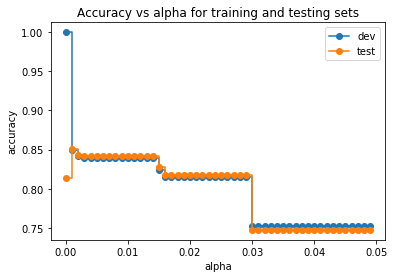

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, dev_scores, marker='o', label="dev",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From the plot, we can find that the scores of test data have an increase when alpha is 0.001, and then it goes down. So I change the range of alpha to do it again.

In [14]:
ccp_alphas_small = np.arange(0,0.002,0.0001)
pipes_s = []
for ccp_alpha in ccp_alphas_small:
    pipe_s = make_pipeline(preprocess,DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha))
    pipe_s.fit(X_dev,y_dev)
    pipes_s.append(pipe_s)
dev_scores_s = [pipe.score(X_dev, y_dev) for pipe in pipes_s]
test_scores_s = [pipe.score(X_test, y_test) for pipe in pipes_s]

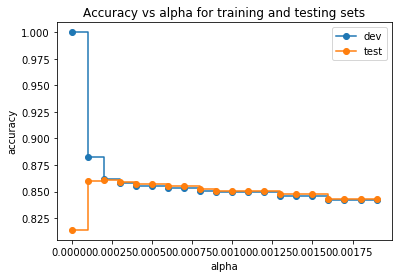

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_small, dev_scores_s, marker='o', label="dev",
        drawstyle="steps-post")
ax.plot(ccp_alphas_small, test_scores_s, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

The result of test data reaches peak when alpha equals to 0.0002.

In [16]:
x = preprocess.fit_transform(X_dev,y_dev)
pipe_ = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.0002)
pipe_.fit(x,y_dev)
max_depths = pipe_.tree_.max_depth
print(f"After pruning, max depth is {max_depths}.")
pipe = make_pipeline(preprocess,DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.0002))
pipe.fit(X_dev,y_dev)
y_pred = pipe.predict(X_test)
print(f"The score on development data is {pipe.score(X_dev,y_dev):0.4f}.")
print(f"The score on test data is {pipe.score(X_test,y_test):0.4f}.")
print(f"The recall on test data is {recall_score(y_test,y_pred,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred,pos_label = 1):0.4f}.")

After pruning, max depth is 13.
The score on development data is 0.8616.
The score on test data is 0.8604.
The recall on test data is 0.6056.
The precision on test data is 0.7930.
The F1-score on test data is 0.6868.


8. List the top 3 most important features for this trained tree? How would you justify these features being the most important? 

In [17]:
import re
def add_feature(feat_imps):
    feats = []
    dic = {}
    for name in list(filter(lambda x: x[1]!=0, feat_imps)):
        match = re.match( r'x([0-9])+_', name[0])
        if match:
            f = ohe_features[int(name[0][1])]
            if f in dic:
                dic[f] += float(name[1])
            else:
                dic[f] = float(name[1])
        else:
            feats.append(name)
    return feats+list(dic.items())  

('marital-status', 'capital-gain', 'education_num')


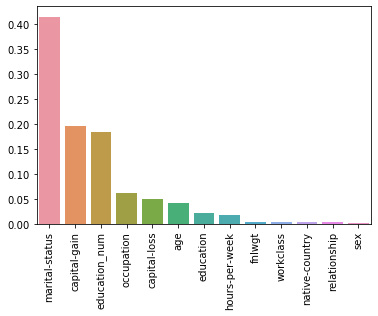

In [18]:
#code here
import seaborn as sns
# best_tree = grid_result.best_estimator_
ohefeature = preprocess.named_transformers_['onehotencoder'].get_feature_names().tolist()
tefeature = preprocess.named_transformers_['targetencoder'].get_feature_names()
feature_names = num_features + ohefeature + tefeature 
feat_imps = zip(feature_names,pipe_.feature_importances_)
feats,imps = zip(*(sorted(add_feature(feat_imps), key = lambda x: x[1], reverse = True)))
print(feats[:3])
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(rotation = 90,axis = 'x')
# x0: marital_status

From the figure, we can find that the marital status, capital gain and education number are three most important features. The marital status can somehow reflect a person's age and whether he has a happy family. Married couples are more likely to earn more because they should have years of working experience and they have a good mental status. Capital gain is important because it directly represents a person's income. People with higher income are more likely to have more capital gain. Education number is important because the employers are more likely to hire those more educated employees. And when applying for a job, people with higher degrees often get more salaries paid.

### Q5: Random Forests

Let's use the same dataset and the splits created in Q3.

1. Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 4.5)?

In [19]:
#code here
from sklearn.ensemble import RandomForestClassifier
# RF = RandomForestClassifier()
pipe = make_pipeline(preprocess,RandomForestClassifier(random_state = 10))
pipe.fit(X_dev,y_dev)
y_pred_forest = pipe.predict(X_test)
print(f"develop: {pipe.score(X_dev,y_dev)}")
print(f"test: {pipe.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_forest,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_forest,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_forest,pos_label = 1):0.4f}.")

develop: 1.0
test: 0.8582794629537543
The recall on test data is 0.6339.
The precision on test data is 0.7648.
The F1-score on test data is 0.6932.


From the result, we can find that it performs better than Decision Tree on the test dataset.

2. Does all trees in the trained random forest model have pure leaves? How would you verify this?

In [20]:
#code here
# I can find the leaf nodes for each tree. And for each node, find out whether the samples of this node belong to a single class.
forest = pipe.named_steps['randomforestclassifier'].estimators_
tree_id = 0
pure = True
for tree in forest:
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    value = tree.tree_.value
    n_nodes = tree.tree_.node_count
    for i in range(n_nodes):
        if children_left[i] == children_right[i] and value[i][0][0] != 0 and value[i][0][1] != 0:
            pure = False
            print(f"Node {i} of tree {tree_id} is impure, the impurity is {impurity[i]}")
    tree_id += 1 
if pure:
    print("All trees in the trained random forest model has pure leaves")
else:
    print("All trees in the trained random forest model doesn't have pure leaves")

All trees in the trained random forest model has pure leaves


3. Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?

In [21]:
#code here
"""
I will choose "n_estimators" and "max_depth". Because an increase of the number of estimators may improve the performance. The 
default value of "max_depth" is None, which means it will generate a pure tree and may be overfitting. So smaller depth may have
better test scores. Besides, when we do classification problems, we usually use square root of the total number of features as 
'max_feature'. So I think we don't need to tune it. 
"""

'\nI will choose "n_estimators" and "max_depth". Because an increase of the number of estimators may improve the performance. The \ndefault value of "max_depth" is None, which means it will generate a pure tree and may be overfitting. So smaller depth may have\nbetter test scores. Besides, when we do classification problems, we usually use square root of the total number of features as \n\'max_feature\'. So I think we don\'t need to tune it. \n'

4. Now, assume you had to choose upto 10 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift? 

In [22]:
#code here
"""
I will choose [100,200,300] for the number of estimators. Because in theory, the more the estimators, the more likely
it can recieve better performance. But large number will cost much, so I choose numbers smaller than 300.
I will choose [5,7,10] for the max depth. Because a smaller tree can avoid overfitting to some extent, and it's very 
time consuming to do cross validation with a large depth. 
"""

"\nI will choose [100,200,300] for the number of estimators. Because in theory, the more the estimators, the more likely\nit can recieve better performance. But large number will cost much, so I choose numbers smaller than 300.\nI will choose [5,7,10] for the max depth. Because a smaller tree can avoid overfitting to some extent, and it's very \ntime consuming to do cross validation with a large depth. \n"

5. Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q5.1? 

In [23]:
from sklearn.model_selection import GridSearchCV
n_tree = [100,200,300]
oob_score = []
n = X_dev.shape[1]
pipe_rfcv = make_pipeline(preprocess,GridSearchCV(RandomForestClassifier(warm_start = True,random_state = 10,oob_score = True),\
                                                  param_grid = [{'n_estimators': n_tree,'max_depth':[5,7,10]}],cv = 10))
pipe_rfcv.fit(X_dev,y_dev)
grid_result_rfcv = pipe_rfcv.named_steps['gridsearchcv']
print(f"best score: {grid_result_rfcv.best_score_}")
print(f"best n estimators: {grid_result_rfcv.best_params_}")
y_pred_rfcv = pipe_rfcv.predict(X_test)
print(f"test: {pipe_rfcv.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_rfcv,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_rfcv,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_rfcv,pos_label = 1):0.4f}.")

best score: 0.8578886545309095
best n estimators: {'max_depth': 10, 'n_estimators': 300}
test: 0.8596055030664678
The recall on test data is 0.5899.
The precision on test data is 0.8020.
The F1-score on test data is 0.6798.


The accuracy and precision is improved, but the recall and F1 score gets lower.

6. Can you find the top 3 most important features from the model trained in Q5.5? How do these features compare to the important features that you found from Q4.8? If they differ, which feature set makes more sense?

('marital-status', 'capital-gain', 'relationship')


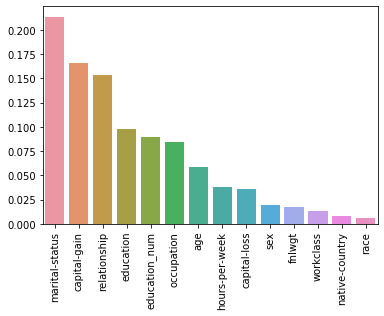

In [24]:
#code here
# x0: marital status ,x1: relationship
import seaborn as sns
best_forest = grid_result_rfcv.best_estimator_
feat_imps = zip(feature_names,best_forest.feature_importances_)
feats,imps = zip(*(sorted(add_feature(feat_imps), key = lambda x: x[1], reverse = True)))
print(feats[:3])
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(rotation = 90,axis = 'x')

From the figure, the top 3 features are 'marital_status', 'capital-gain' and 'relationship'. And the difference between Decision Tree and Random Forest is that Random Forest has 'relationship' instead of 'education_num'. I think the result of Random Forest makes more sense because the information conveyed by 'relationship' and 'marital_status' has some overlaps, so if 'marital-status' is important, 'relationship' should be important as well. And when we fix one marital status, the relationship can help us to specify a group of people more precisely.

### Q6: Gradient Boosted Trees

Let's use the same dataset and the splits created in Q3.

1. Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 10-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.

When selecting the hyperparameter, because the dataset is imbalanced, we may use F1-score to choose the best hyperparameters by adding 'scoring = make_scorer(f1_score)' to GridSearchCV. But due to the long running time, I don't retune the model. So the results below are still selected by the accuracy. 

In [25]:
#code here
# learning_rate,n_estimators,max_depth,max_iter
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.base import TransformerMixin
import time


#  
start_time = time.time()
pipe_gb = make_pipeline(preprocess,GridSearchCV(GradientBoostingClassifier(random_state = 10),\
                                                  param_grid = [{'learning_rate': [0.001,0.01,0.1],'n_estimators':[50,100,150],'max_depth':[5,7,10]}],cv = 10))
pipe_gb.fit(X_dev,y_dev)
grid_result_gb = pipe_gb.named_steps['gridsearchcv']
print(f"best score: {grid_result_gb.best_score_}")
print(f"best depth: {grid_result_gb.best_params_}")
y_pred_gb = pipe_gb.predict(X_test)
print(f"test: {pipe_gb.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_gb,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_gb,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_gb,pos_label = 1):0.4f}.")
print("---Running time of model selection for gradient boosting: %s seconds ---" % (time.time() - start_time))


best score: 0.8696587685965806
best depth: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
test: 0.8731974142217802
The recall on test data is 0.6614.
The precision on test data is 0.8019.
The F1-score on test data is 0.7249.
---Running time of model selection for gradient boosting: 1915.3277642726898 seconds ---


In [26]:
import scipy as sp
class DenseTransformer(TransformerMixin):
    def fit(self, X, y = None, **fit_params):
        return self
    def transform(self, X, y = None, **fit_params):
#         X = sp.sparse.bsr_matrix(X)
        return X.todense()
start_time = time.time()
# skfold = StratifiedKFold(n_splits = 10, shuffle = False)
pipe_hgb = make_pipeline(preprocess,  GridSearchCV(HistGradientBoostingClassifier(random_state = 10, warm_start = True),\
                                                  param_grid = [{'learning_rate': [0.001,0.01,0.1],'l2_regularization':[0,0.01,0.1],'max_depth':[5,7,10]}],cv = 10))
pipe_hgb.fit(X_dev,y_dev)
grid_result_hgb = pipe_hgb.named_steps['gridsearchcv']
print(f"best score: {grid_result_hgb.best_score_}")
print(f"best depth: {grid_result_hgb.best_params_}")
y_pred_hgb = pipe_hgb.predict(X_test)
print(f"test: {pipe_hgb.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_hgb,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_hgb,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_hgb,pos_label = 1):0.4f}.")
print("---Running time of model selection for hist gradient boosting: %s seconds ---" % (time.time() - start_time))

best score: 0.8687886544621828
best depth: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 7}
test: 0.8707110890104426
The recall on test data is 0.6503.
The precision on test data is 0.8005.
The F1-score on test data is 0.7176.
---Running time of model selection for hist gradient boosting: 505.496488571167 seconds ---


2. Train an XGBoost model by tuning 3 hyperparameters using cross-validation. Report on the optimal hyperparameters and the time to train the model. Compare the performance of the trained XGBoost model on test dataset against the performances obtained from 6.1 

In [27]:
#code here
from xgboost import XGBClassifier
start_time = time.time()
pipe_xgb = make_pipeline(preprocess, GridSearchCV(XGBClassifier(random_state = 10,eval_metric = 'logloss'),\
                                                  param_grid = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[100,200,300],'max_depth':[5,7,10]}],cv = 10))
pipe_xgb.fit(X_dev,y_dev)
grid_result_xgb = pipe_xgb.named_steps['gridsearchcv']
print(f"best score: {grid_result_xgb.best_score_}") 
print(f"best depth: {grid_result_xgb.best_params_}")
y_pred_xgb = pipe_xgb.predict(X_test)
print(f"test: {pipe_xgb.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_xgb,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_xgb,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_xgb,pos_label = 1):0.4f}.")
print("---Running time of model selection for XGBoost: %s seconds ---" % (time.time() - start_time))

best score: 0.869451592019183
best depth: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
test: 0.8733631692358694
The recall on test data is 0.6627.
The precision on test data is 0.8016.
The F1-score on test data is 0.7256.
---Running time of model selection for XGBoost: 1301.059159040451 seconds ---


3. Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q4.5 and Q5.5. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?

In [28]:
#code here
"""
The Decision Tree without pruning performs the worst, and XGBoost performs the best. The accuracy difference between the two is 
about 0.07, which means using XGBoost can improve the result by 7%. And the F1-score is also improved. But XGBoost is time 
consuming, so I will choose Hist Gradient Boosting which has almost the same performance as XGBoost but can save much time.
"""


'\nThe Decision Tree without pruning performs the worst, and XGBoost performs the best. The accuracy difference between the two is \nabout 0.07, which means using XGBoost can improve the result by 7%. And the F1-score is also improved. But XGBoost is time \nconsuming, so I will choose Hist Gradient Boosting which has almost the same performance as XGBoost but can save much time.\n'

4. Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?

('marital-status', 'relationship', 'education_num')


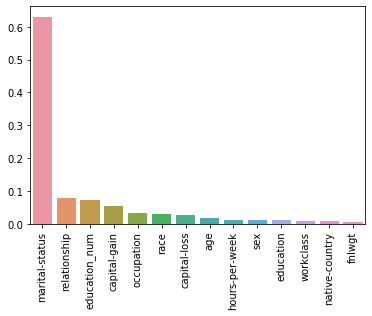

In [29]:
#code here
best_xgb = grid_result_xgb.best_estimator_
feat_imps = zip(feature_names,best_xgb.feature_importances_)
feats,imps = zip(*(sorted(add_feature(feat_imps), key = lambda x: x[1], reverse = True)))
print(feats[:3])
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(rotation = 90,axis = 'x')

From the figure, the top 3 features are 'marital-status', 'relationship' and 'education_num'. The difference between Random Forest and XGBoost is that XGBoost has 'education_num' instead of 'relationship', and the difference between Decision Tree and XGBoost is that XGBoost has 'relationship' instead of 'capital_gain'. I will trust the result of XGBoost the most, since it has the best test scores.

5. Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q6.2? Does this model perform better than the one trained in Q6.2? Why or why not is the performance better?

In [30]:
#code here
feature = list(feats[:7])
num_feature_7 = [f for f in num_features if f in feature]
ohe_feature_7 = [f for f in ohe_features if f in feature]
te_feature_7 = [f for f in te_features if f in feature]
X_dev_7 = X_dev[feature]
X_test_7 = X_test[feature]
preprocess_7 = make_column_transformer((StandardScaler(),num_feature_7),
                                     (OneHotEncoder(handle_unknown = "ignore"),ohe_feature_7),
                                    (TargetEncoder(handle_unknown = "ignore"),te_feature_7))
start_time = time.time()
pipe_xgb7 = make_pipeline(preprocess_7, GridSearchCV(XGBClassifier(random_state = 10,eval_metric = 'logloss'),\
                                                  param_grid = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[100,200,300],'max_depth':[5,7,10]}],cv = 10))
pipe_xgb7.fit(X_dev,y_dev)
grid_result_xgb7 = pipe_xgb7.named_steps['gridsearchcv']
print(f"best score: {grid_result_xgb7.best_score_}") 
print(f"best depth: {grid_result_xgb7.best_params_}")
y_pred_xgb7 = pipe_xgb7.predict(X_test)
print(f"test: {pipe_xgb7.score(X_test,y_test)}")
print(f"The recall on test data is {recall_score(y_test,y_pred_xgb7,pos_label = 1):0.4f}.")
print(f"The precision on test data is {precision_score(y_test,y_pred_xgb7,pos_label = 1):0.4f}.")
print(f"The F1-score on test data is {f1_score(y_test,y_pred_xgb7,pos_label = 1):0.4f}.")
print("---Running time of model selection for XGBoost: %s seconds ---" % (time.time() - start_time))

best score: 0.8610385701001828
best depth: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
test: 0.8642466434609647
The recall on test data is 0.6214.
The precision on test data is 0.7965.
The F1-score on test data is 0.6981.
---Running time of model selection for XGBoost: 844.9141209125519 seconds ---


This model doesn't perform better because after all, it loses some features to fit the model. Even if those are less important, they still comtain information to improve the performance of the model.

### Q7: Calibration

Let's use the same dataset and the splits created in Q3. Let's use the XGBoost model that you trained in Q6.2. 

1. Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q6.2) scored on the test dataset. 

In [31]:
#code here
from sklearn.metrics import brier_score_loss
y_pred = pipe_xgb.predict_proba(X_test)
brier = brier_score_loss(y_test,y_pred[:,1])
print(f"brier score for the XGBoost model is {brier:0.4f}.")

brier score for the XGBoost model is 0.0890.


2. Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods

In [34]:
X_train, X_cal, y_train, y_cal = train_test_split(X_dev, y_dev, test_size = 0.2, train_size=0.8,random_state = 10)
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['fnlwgt', 'age',
                                                   'education_num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital-status',
                                                   'relationship', 'race',
                                                   'sex']),
                                                 ('targetencoder',
                                                  TargetE

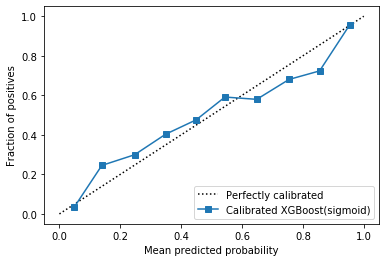

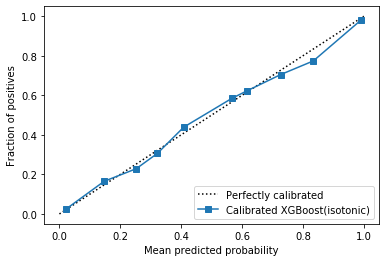

In [36]:
from sklearn.calibration import CalibratedClassifierCV,calibration_curve

cal_platt = CalibratedClassifierCV(grid_result_xgb.best_estimator_,cv = 'prefit',method = "sigmoid")
X_cal_scaled = preprocess.transform(X_cal)
cal_platt.fit(X_cal_scaled,y_cal)
X_test_scaled = preprocess.transform(X_test)
display = CalibrationDisplay.from_estimator(cal_platt,X_test_scaled,y_test,n_bins = 10,name = "Calibrated XGBoost(sigmoid)")
cal_iso = CalibratedClassifierCV(grid_result_xgb.best_estimator_,cv = 'prefit',method = "isotonic")
cal_iso.fit(X_cal_scaled,y_cal)
display = CalibrationDisplay.from_estimator(cal_iso,X_test_scaled,y_test,n_bins = 10,name = "Calibrated XGBoost(isotonic)")

3. Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?

In [37]:
#code here
y_platt_pro = cal_platt.predict_proba(X_test_scaled)
brier_platt = brier_score_loss(y_test,y_platt_pro[:,1])
y_iso_pro = cal_iso.predict_proba(X_test_scaled)
brier_iso = brier_score_loss(y_test,y_iso_pro[:,1])
print(f"Brier score from Platting scaling: {brier_platt:0.4f}")
print(f"Brier score from Isotonic regression: {brier_iso:0.4f}")

Brier score from Platting scaling: 0.0931
Brier score from Isotonic regression: 0.0908


Calibration methods don't help in having better predicted probabilities in this problem.